# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [2]:
# Your code here
data = pd.read_csv("paysim.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [7]:
data.describe(include='O').T

,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
nameOrig,6362620,6353307,C1462946854,3
nameDest,6362620,2722362,C1286084959,113


<font color='blue'>Calculate unique values
</font>

In [8]:
for column in data.columns:
    print(f'----- {column} -----')
    print(data[column].unique())

----- step -----
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 2

In [9]:
for column in data.columns:
    print(f'----- {column} -----')
    print(data[column].value_counts(ascending=False).head())

----- step -----
19     51352
18     49579
187    49083
235    47491
307    46968
Name: step, dtype: int64
----- type -----
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64
----- amount -----
10000000.0    3207
10000.0         88
5000.0          79
15000.0         68
500.0           65
Name: amount, dtype: int64
----- nameOrig -----
C1462946854    3
C1976208114    3
C724452879     3
C2051359467    3
C1832548028    3
Name: nameOrig, dtype: int64
----- oldbalanceOrg -----
0.0      2102449
184.0        918
133.0        914
195.0        912
164.0        909
Name: oldbalanceOrg, dtype: int64
----- newbalanceOrig -----
0.00        3609566
3420.22           4
7717.83           4
17979.82          4
9897.82           4
Name: newbalanceOrig, dtype: int64
----- nameDest -----
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
Name: nameDest, dtype: int64
----- oldbalanceDest --

<font color='blue'>Histogram of the numeric
</font>

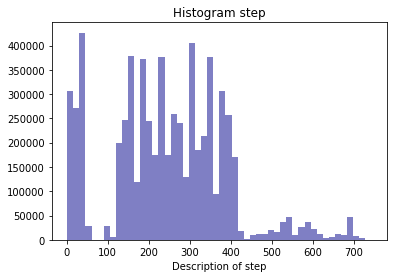

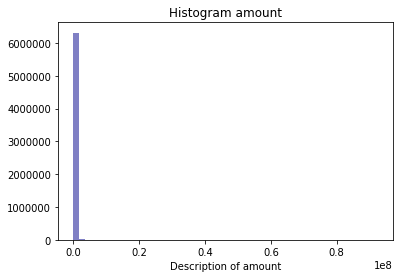

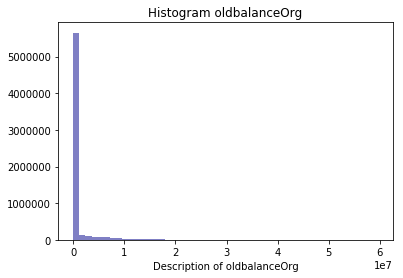

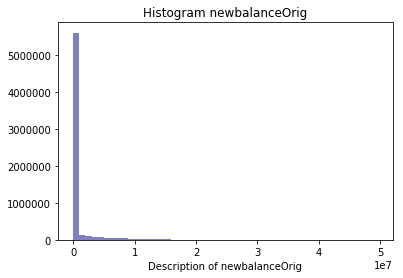

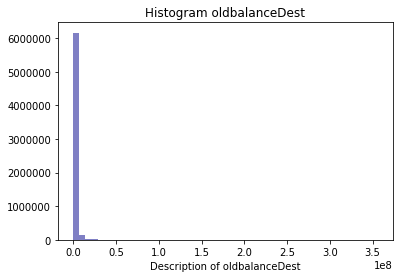

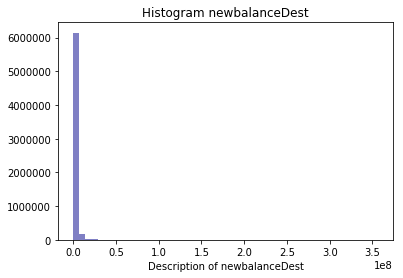

In [10]:
list_histo = ['step', 'amount','oldbalanceOrg','newbalanceOrig',
             'oldbalanceDest','newbalanceDest']
for column in list_histo:
    x = data[column]
    bins = 50
    n, bins, patches = plt.hist(x, bins, facecolor="darkblue", alpha=0.5)
    plt.xlabel(f'Description of {column}')
    plt.title(f'Histogram {column}')
    plt.show()

<font color='blue'>Bar chart
</font>

In [11]:
gr_type = data.groupby('type')['step'].count().reset_index()
gr_type.columns = ['type', 'num']
gr_type.head()

,type,num
0,CASH_IN,1399284
1,CASH_OUT,2237500
2,DEBIT,41432
3,PAYMENT,2151495
4,TRANSFER,532909


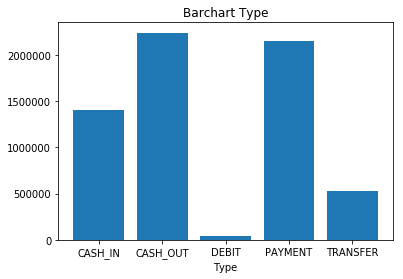

In [12]:
plt.figure()
plt.bar(gr_type.type, gr_type.num)
plt.title(f'Barchart Type')
plt.xlabel('Type')
plt.show()

<font color='blue'>Correlation
</font>

In [13]:
corr = data.corr()

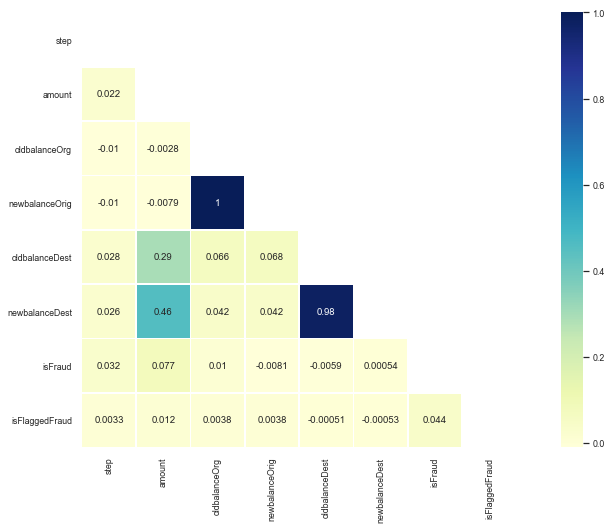

In [14]:
plt.figure(figsize=(16,8))
sns.set(font_scale=0.8)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, cmap="YlGnBu", linewidths=.5, annot=True)
    

<font color='blue'>**COMMENTS:**<br>
* The important features to the outcome I think it will be STEP, TŸPE AND AMOINT
</font>

### What is the distribution of the outcome? 

In [15]:
out = data.groupby('isFraud')['step'].count().reset_index()
out.columns = ['isFraud', 'num']
out.head()

,isFraud,num
0,0,6354407
1,1,8213


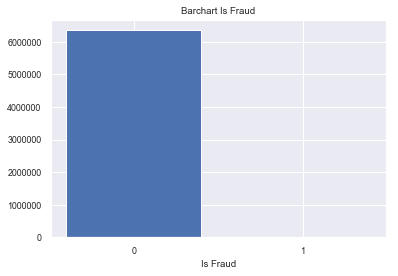

In [16]:
plt.figure()
plt.bar(['0','1'], [6354407,8213])
plt.title(f'Barchart Is Fraud')
plt.xlabel('Is Fraud')
plt.show()

In [17]:
outf = data.groupby('isFlaggedFraud')['step'].count().reset_index()
outf.columns = ['isFlaggedFraud', 'num']
outf.head()

,isFlaggedFraud,num
0,0,6362604
1,1,16


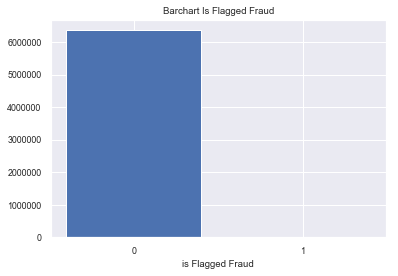

In [18]:
plt.figure()
plt.bar(['0','1'], [6362604,16])
plt.title(f'Barchart Is Flagged Fraud')
plt.xlabel('is Flagged Fraud')
plt.show()

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

<font color='blue'>A step is one hour, maybe we can change it to days
</font>

In [19]:
data['days'] = data['step'].apply(lambda x: x/24)

In [20]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,days
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.041667
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.041667
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.041667
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.041667
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.041667


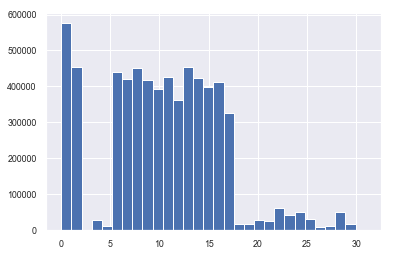

In [21]:
plt.hist(data['days'], bins=30)
plt.show()

### Run a logisitc regression classifier and evaluate its accuracy.

In [22]:
one_hot_type = data[['type']].stack().str.get_dummies().sum(level=0).iloc[:,:-1].add_prefix('type_')


In [23]:
one_hot_type.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT
0,0,0,0,1
1,0,0,0,1
2,0,0,0,0
3,0,1,0,0
4,0,0,0,1


In [24]:
data_enc = one_hot_type.join(data)

In [25]:
data_enc.columns

Index(['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'step',
       'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'days'],
      dtype='object')

<font color='blue'>Unbalanced Data Model
</font>

In [26]:
X = data_enc[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'amount', 'days']]

In [27]:
y = data_enc['isFraud']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [29]:
clf = LogisticRegression(random_state=10, solver='lbfgs')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
y_pred = clf.predict(X_test)

In [31]:
clf.score(X_train, y_train)

0.9987145625544194

In [32]:
clf.score(X_test, y_test)

0.9986876475414216

In [33]:
f1_score(y_test, y_pred)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [34]:
print(f1_score)

<function f1_score at 0x1a24e67620>


In [35]:
confusion_matrix(y_test, y_pred)


array([[1270854,       0],
       [   1670,       0]])

In [36]:
roc_auc_score(y_test, y_pred)

0.5

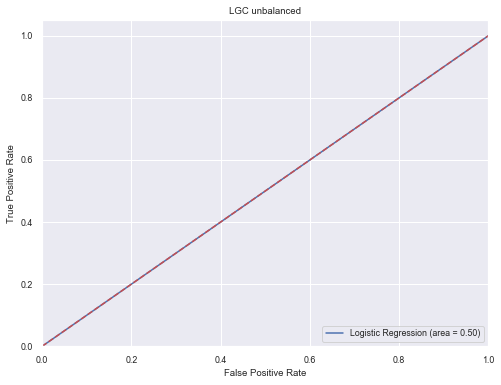

In [37]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGC unbalanced')
plt.legend(loc="lower right")
plt.show()

<font color='blue'>The accuracy seams very good, but is not, as the model do not detect any Fraud at all
</font>

<font color='blue'>Balanced Data
</font>

In [38]:
data_enc_1 = data_enc.loc[data_enc['isFraud'] == 1]

In [39]:
data_enc_1.shape

(8213, 16)

In [40]:
data_enc_0 = data_enc.loc[data_enc['isFraud'] == 0].head(8213)

In [41]:
data_enc_0.shape

(8213, 16)

In [42]:
data_enc_train = pd.concat([data_enc_1.iloc[:7000,:],data_enc_0.iloc[:7000,:]], axis=0, join='outer', ignore_index=True)
data_enc_test = pd.concat([data_enc_1.iloc[7001:,:],data_enc_0.iloc[7001:,:]], axis=0, join='outer', ignore_index=True)
               
                         

In [43]:
data_enc_train.shape

(14000, 16)

In [44]:
data_enc_test.shape

(2424, 16)

In [45]:
X_train = data_enc_train[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'amount', 'days']]
y_train = data_enc_train['isFraud']

In [46]:
X_test = data_enc_test[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'amount', 'days']]
y_test = data_enc_test['isFraud']

In [47]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, shuffle=True)


In [48]:
clf = LogisticRegression(random_state=10, solver='lbfgs',
                         multi_class='multinomial')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
y_pred = clf.predict(X_test)

In [50]:
clf.score(X_train, y_train)

0.5

In [51]:
clf.score(X_test, y_test)

0.5

In [52]:
f1_score(y_test, y_pred)

0.6666666666666666

In [53]:
print(f1_score)

<function f1_score at 0x1a24e67620>


In [54]:
confusion_matrix(y_test, y_pred)


array([[   0, 1212],
       [   0, 1212]])

In [55]:
roc_auc_score(y_test, y_pred)

0.5

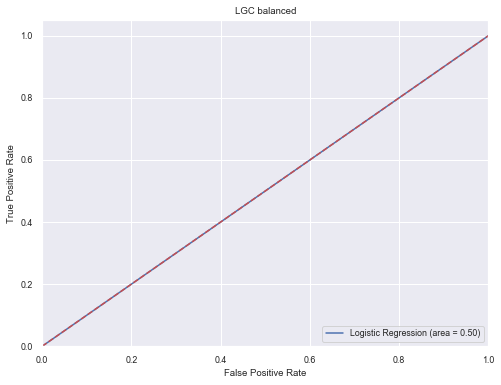

In [56]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGC balanced')
plt.legend(loc="lower right")
plt.show()

<font color='blue'>RESAMPLE
</font>

In [57]:
from sklearn.utils import resample

In [58]:
data_enc['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [59]:
# Separate majority and minority classes

df_majority = data_enc[data_enc.isFraud==0]
df_minority = data_enc[data_enc.isFraud==1]

In [60]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=6354407,    # to match majority class
                                 random_state=123) # reproducible results

In [61]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [62]:
# Display new class counts
df_upsampled.isFraud.value_counts()

1    6354407
0    6354407
Name: isFraud, dtype: int64

In [63]:
X = df_upsampled[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'amount', 'days']]

In [64]:
y = df_upsampled['isFraud']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [66]:
clf = LogisticRegression(random_state=10, solver='lbfgs',
                         multi_class='multinomial')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
y_pred = clf.predict(X_test)

In [68]:
clf.score(X_train, y_train)

0.49903408569505553

In [ ]:
clf.score(X_test, y_test)

0.4989434498810471

In [ ]:
f1_score(y_test, y_pred)

0.6657268490290841

In [ ]:
print(f1_score)

<function f1_score at 0x1a24e67620>


In [ ]:
confusion_matrix(y_test, y_pred)


array([[      0, 1271060],
       [   2507, 1268196]])

In [ ]:
roc_auc_score(y_test, y_pred)

0.499013538175325

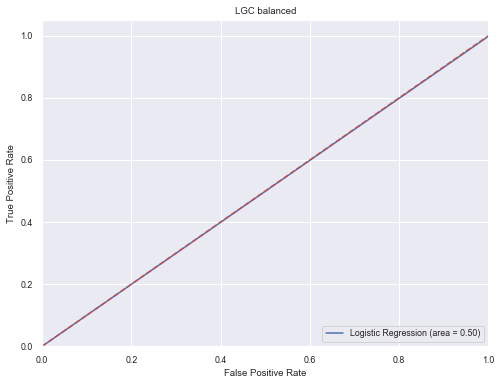

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGC balanced')
plt.legend(loc="lower right")
plt.show()

### Now pick a model of your choice and evaluate its accuracy.

<font color='blue'>Random Forrest Classifier
</font>

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
X = data_enc[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'amount', 'days']]

In [ ]:
y = data_enc['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [ ]:
rfc = RandomForestClassifier()


In [ ]:
rfc.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
rfc.score(X_train, y_train)

0.9998112019891177

In [ ]:
rfc.score(X_test, y_test)

0.9990389179300351

In [ ]:
f1_score(y_test, y_pred)

0.4927416009954375

In [ ]:
print(f1_score)

<function f1_score at 0x1a24e67620>


In [ ]:
confusion_matrix(y_test, y_pred)


array([[1270707,     147],
       [   1076,     594]])

In [ ]:
roc_auc_score(y_test, y_pred)

0.6777864762522036

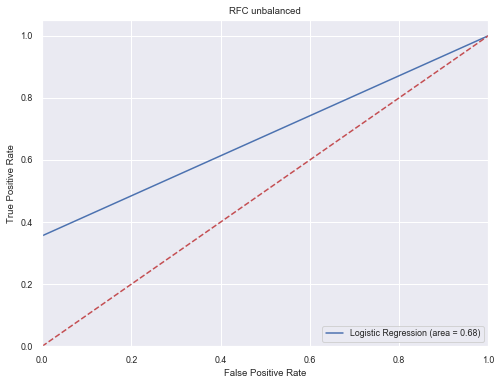

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC unbalanced')
plt.legend(loc="lower right")
plt.show()

<font color='blue'> Penalized SVM
</font>

In [ ]:
from sklearn.svm import SVC

In [ ]:
X = data_enc[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'amount', 'days']]

In [ ]:
y = data_enc['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [ ]:
svc = SVC(gamma='auto', kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)

In [ ]:
svc.fit(X_train, y_train)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
svc.score(X_train, y_train)

In [ ]:
svc.score(X_test, y_test)

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
print(f1_score)

In [ ]:
confusion_matrix(y_test, y_pred)


In [ ]:
roc_auc_score(y_test, y_pred)

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM unbalanced')
plt.legend(loc="lower right")
plt.show()

### Which model worked better and how do you know?

<font color='blue'>**COMMENTS**:
* The Logistic Regression Classifier with the unbalanced data do not work at all, it overfits.
* The Logistic Regression Classifier with the balanced data has worked better, but still not predict more than random (50%)
* The Random Forrest Classifier with unbalanced data has worked better that Logistic regression
* Finally the penalized SVM I waasn't able to make it do the fit :(
</font>